# Analyze output from RTS GAN for GA dataset 
## Code from TimeGAN
Apr 3, 2024

In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pickle

# 3. Metrics
from visualization_metrics import *


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib widget

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: 
- seq_len: sequence length of the time-series data

### Training data 

In [9]:
fname = '/Users/venkitesh_work/Documents/work/Sapient_AI/Data/Ousai_encoder_data/Saved_data/GA_dataset/npy_files_ML_input/normed_data/ga_normed_ml.npy'
ip_data = np.load(fname)
# print(ip_data.shape)

t_size       = 100
train_size   = 800
seq_len      = t_size
channel_list =[1,2,6,12,21]

ori_data = [i[channel_list,:t_size].T for i in ip_data[:train_size]]

train_data = np.array(ori_data)

### Generated data 

In [11]:
## Load generated data 
root_dir='/Users/venkitesh_work/Documents/work/Sapient_AI/Data/repos/rts_gan/stock_result/'

fname='stock_3_ga_dset_5000itr/data'
with open("{0}/{1}".format(root_dir,fname), "rb") as f:
    result = pickle.load(f)
gen_data=np.array(result)

In [12]:
## Or just take a different set of training data 
# gen_data = train_data[200:400]
# train_data=train_data[:200]
# train_data=train_data[200:400]

print(train_data.shape,gen_data.shape)

(800, 100, 5) (800, 100, 5)


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

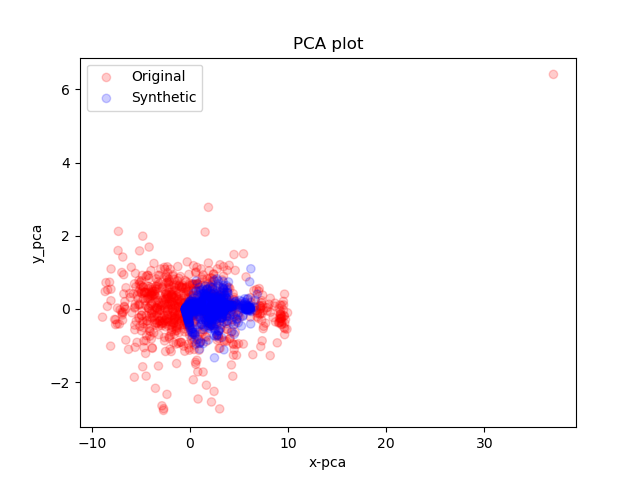

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.000s...
[t-SNE] Computed neighbors for 1600 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.016285
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.529762
[t-SNE] KL divergence after 300 iterations: 1.075334


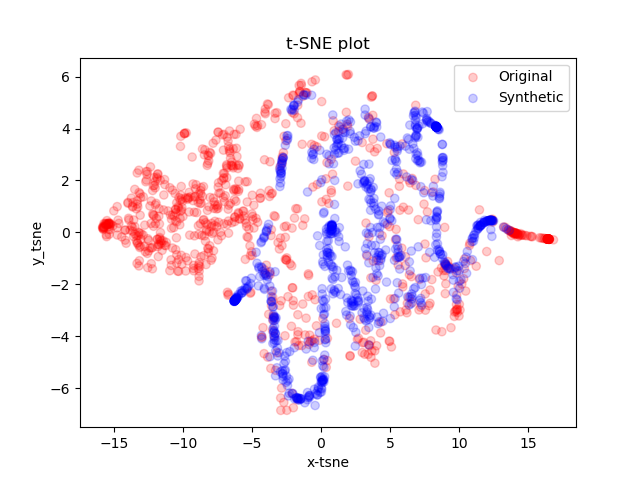

In [13]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')